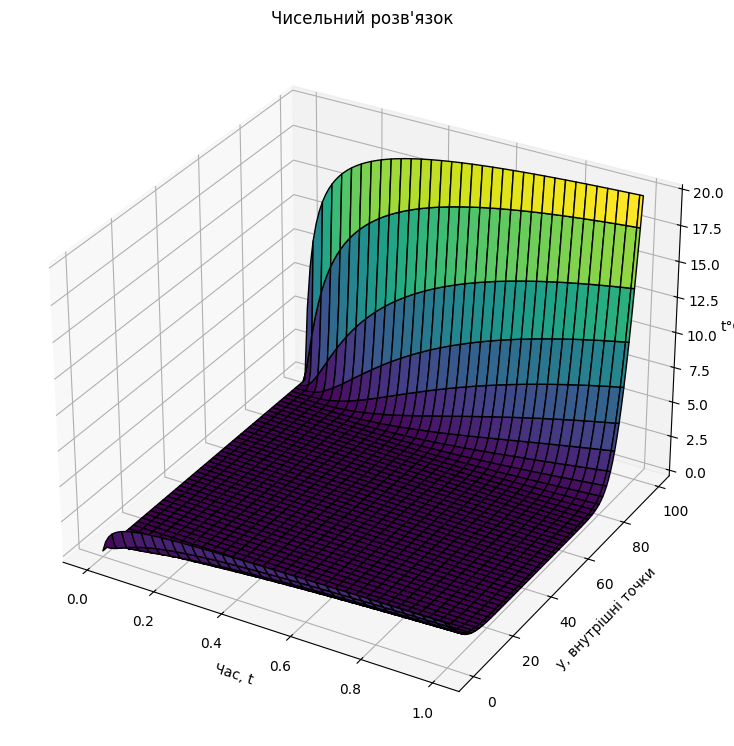

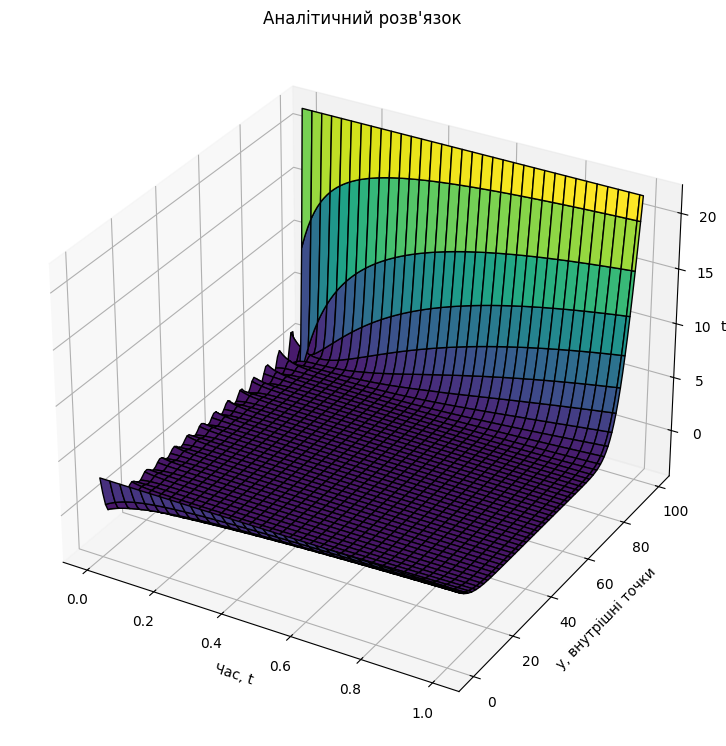

MAE:  21.999999999999957
MSE:  0.6779194101708763


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def analytical_heat(t, y):  
    sum = 0  
    for n in range(1, 31):  
        sum += (1 / n) * (22 * (-1)**n - 3) * math.exp(-((math.pi * n / 0.01)**2) * 0.34e-6 * t) * math.sin(((math.pi * n / 0.01) * y))  
    return 1900 * y + 3 + (2 / math.pi) * sum  


def fi (i, ut):
    if i == 0: 
        return 34 * (ut[i+1] - 2 * ut[i] + 3)
    elif i == 99: 
        return 34 * (22 - 2 * ut[i] + ut[i-1])
    else:  
        return 34 * (ut[i+1] - 2 * ut[i] + ut[i-1])

h = 0.01
T = 1
steps = math.floor(T / h)
N = 100
uy = np.zeros(N)

def rungeKuttHeat(uy, h, T, N):
    result = []
    result.append(uy)
    
    for j in range(steps):
        k1 = []
        for i in range(N):
            k1.append(fi(i, result[j]))
            k2 = []
        uyk2 =  np.array(result[j]) + np.array(k1) * (h / 2)
        for i in range(N):
            k2.append(fi(i, uyk2))
        uyk3 =  np.array(result[j]) + np.array(k2) * (h / 2)
        k3 = []
        for i in range(N):
            k3.append(fi(i, uyk3))
        uyk4 =  np.array(result[j]) + np.array(k3) * h
        k4 = []
        for i in range(N):
            k4.append(fi(i, uyk4))
        u_next = result[j] + (np.array(k1) + 2 * np.array(k2) + 2 * np.array(k3) + np.array(k4)) * (h / 6)
        result.append(u_next)
    return result

numeric_result = rungeKuttHeat(uy, h, T, N)
numeric_result = np.array(numeric_result)

analytical_result = []
t = np.arange(0, T + h, h)
y_values = np.linspace(0, 0.01, N)
for ti in t:
    row = []  
    for yi in y_values:
        row.append(analytical_heat(ti, yi))  
    analytical_result.append(row)  

analytical_result = np.array(analytical_result)

def plot_heat(result, title):
    t = np.arange(0, T + h, h)
    y = np.arange(N)
    T_plot, Y = np.meshgrid(t, y, indexing="ij")
    Z = result
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(T_plot, Y, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Час, t')
    ax.set_ylabel('y, внутрішні точки')
    ax.set_zlabel('t°C')
    ax.set_title(title)
    plt.grid(True) 
    plt.show()

plot_heat(numeric_result, "Чисельний розв'язок")
plot_heat(analytical_result, "Аналітичний розв'язок")

mae = np.max(np.absolute(analytical_result - numeric_result))

mse = (np.sum((analytical_result - numeric_result)** 2)) / (steps * N)

print('MAE: ', mae)
print('MSE: ', mse)